# J Spectro

In [81]:
data = pd.read_csv("/workspaces/Hit_Song_Prediction_Model/tracks.csv", engine='python', on_bad_lines='skip')

In [82]:
print(data.head())
print(data.info())

                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

In [84]:
import pandas as pd

# Try reading the CSV file while handling potential errors
try:
    data = pd.read_csv("/workspaces/Hit_Song_Prediction_Model/tracks.csv", 
                   engine='python', 
                   quotechar="'", 
                   on_bad_lines='skip')
except Exception as e:
    print(f"Error loading data: {e}")


In [85]:
data = pd.read_csv(
    "/workspaces/Hit_Song_Prediction_Model/tracks.csv", 
    engine='python', 
    on_bad_lines='skip'  # This skips rows with parsing errors
)

In [86]:
# Convert 'release_date' to datetime, coercing errors into NaT
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [87]:
data['release_date'] = data['release_date'].fillna(pd.Timestamp('1900-01-01'))

In [88]:
data['release_date'] = data['release_date'].fillna(method='ffill')  # forward fill
# OR
data['release_date'] = data['release_date'].fillna(method='bfill')  # backward fill

/tmp/ipykernel_11454/1665092154.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['release_date'] = data['release_date'].fillna(method='ffill')  # forward fill
/tmp/ipykernel_11454/1665092154.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['release_date'] = data['release_date'].fillna(method='bfill')  # backward fill


In [89]:
data = data.sort_values('release_date')

In [90]:
# Forward fill missing release_date values
data['release_date'] = data['release_date'].ffill()

# Or use backward fill if you prefer
# data['release_date'] = data['release_date'].bfill()

In [91]:
data = data.sort_values('release_date')

In [92]:
data['Year'] = data['release_date'].dt.year
data['Month'] = data['release_date'].dt.month
data['Day'] = data['release_date'].dt.day

In [93]:
data['popularity_lag_1_week'] = data['popularity'].shift(7)
data['popularity_lag_1_month'] = data['popularity'].shift(30)
data['popularity_lag_1_year'] = data['popularity'].shift(365)


In [94]:
data['rolling_2_month_avg'] = data['popularity'].rolling(window=60, min_periods=1).mean()

In [95]:
data['expanding_max'] = data['popularity'].expanding().max()

In [96]:
data.set_index('release_date', inplace=True)
quarterly_data = data['popularity'].resample('Q').mean().reset_index()
quarterly_data.rename(columns={'popularity': 'quarterly_avg_popularity'}, inplace=True)


/tmp/ipykernel_11454/395041949.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = data['popularity'].resample('Q').mean().reset_index()


In [97]:
yearly_data = data['popularity'].resample('Y').mean().reset_index()
yearly_data.rename(columns={'popularity': 'yearly_avg_popularity'}, inplace=True)

/tmp/ipykernel_11454/533812098.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data['popularity'].resample('Y').mean().reset_index()


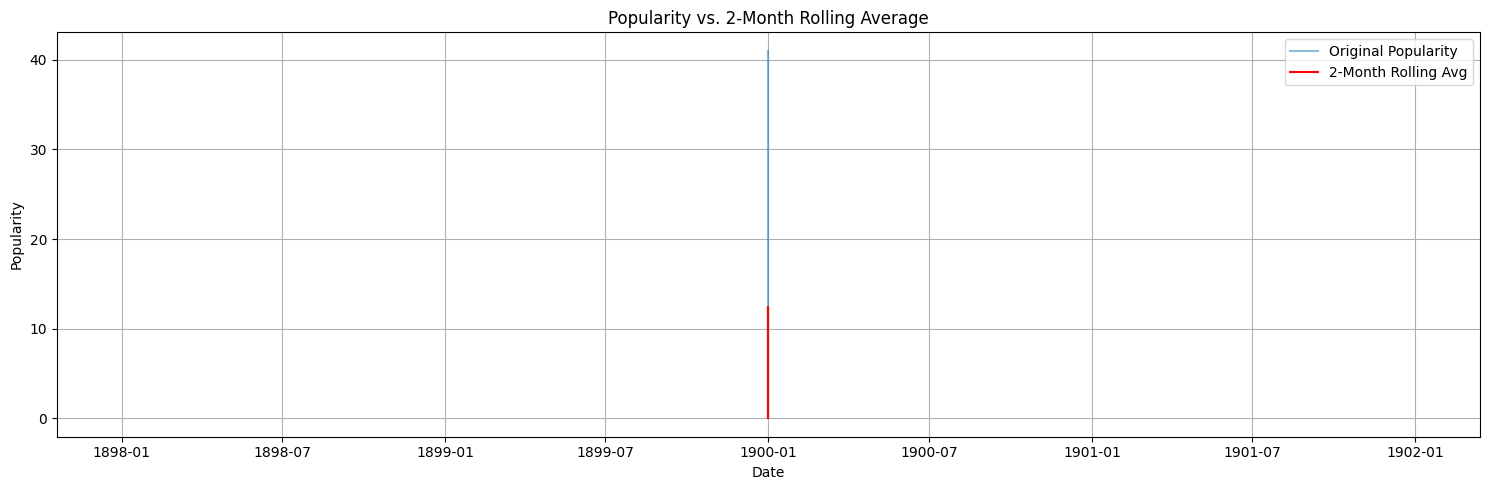

In [98]:
import matplotlib.pyplot as plt

# Plot the first 500 rows to avoid overplotting
plt.figure(figsize=(15, 5))
plt.plot(data.index[:500], data['popularity'][:500], label='Original Popularity', alpha=0.5)
plt.plot(data.index[:500], data['rolling_2_month_avg'][:500], label='2-Month Rolling Avg', color='red')
plt.title('Popularity vs. 2-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


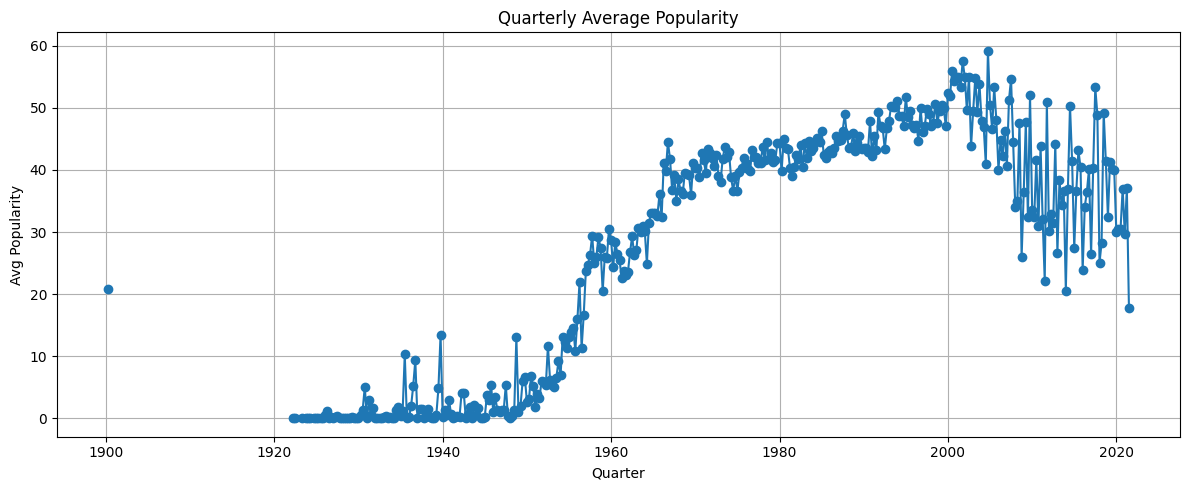

In [99]:
plt.figure(figsize=(12, 5))
plt.plot(quarterly_data['release_date'], quarterly_data['quarterly_avg_popularity'], marker='o')
plt.title('Quarterly Average Popularity')
plt.xlabel('Quarter')
plt.ylabel('Avg Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


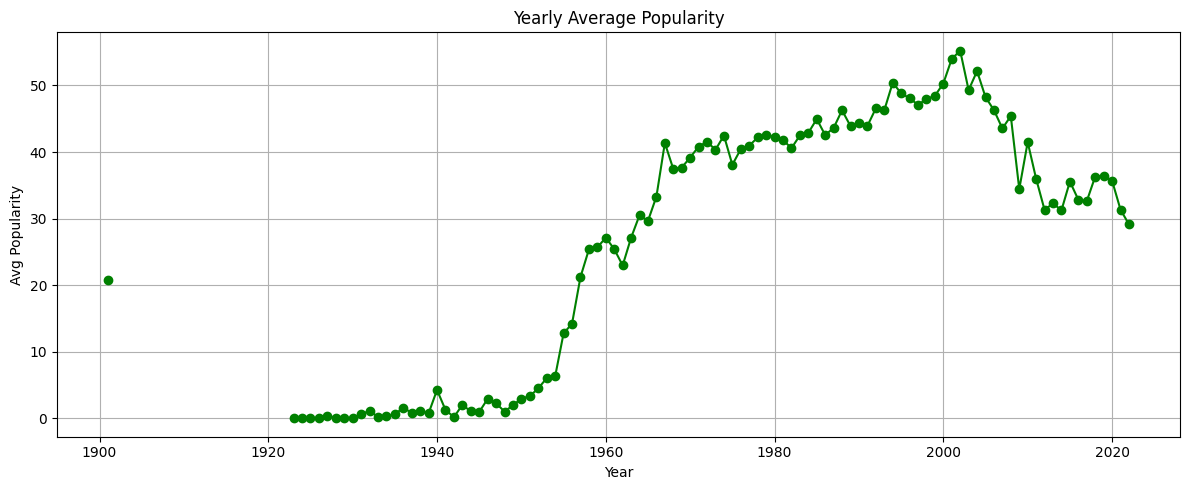

In [100]:
plt.figure(figsize=(12, 5))
plt.plot(yearly_data['release_date'], yearly_data['yearly_avg_popularity'], marker='o', color='green')
plt.title('Yearly Average Popularity')
plt.xlabel('Year')
plt.ylabel('Avg Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


In [101]:
data.reset_index(inplace=True)  # remove datetime index if set earlier
data.to_csv('enhanced_tracks_features.csv', index=False)


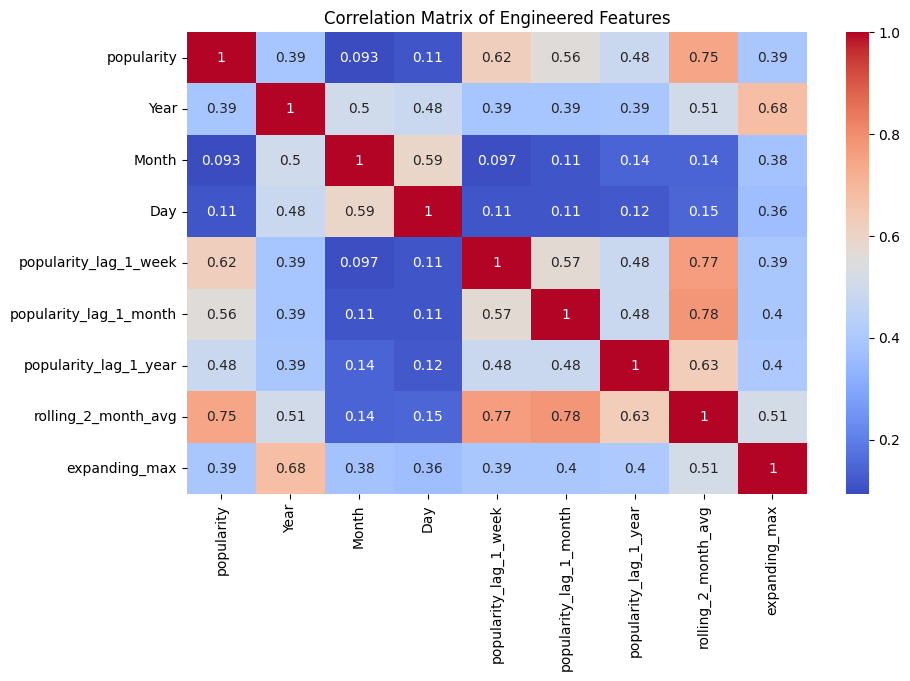

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (after feature engineering)
corr_data = data[['popularity', 'Year', 'Month', 'Day',
                  'popularity_lag_1_week', 'popularity_lag_1_month', 'popularity_lag_1_year',
                  'rolling_2_month_avg', 'expanding_max']].copy()

# Compute correlation matrix
correlation_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Engineered Features')
plt.show()


In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Drop rows with NaNs caused by lags
model_data = corr_data.dropna()

# Define X and y
X = model_data.drop(columns='popularity')
y = model_data['popularity']

# Impute any remaining NaNs
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [104]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')


Mean Squared Error: 245.1132


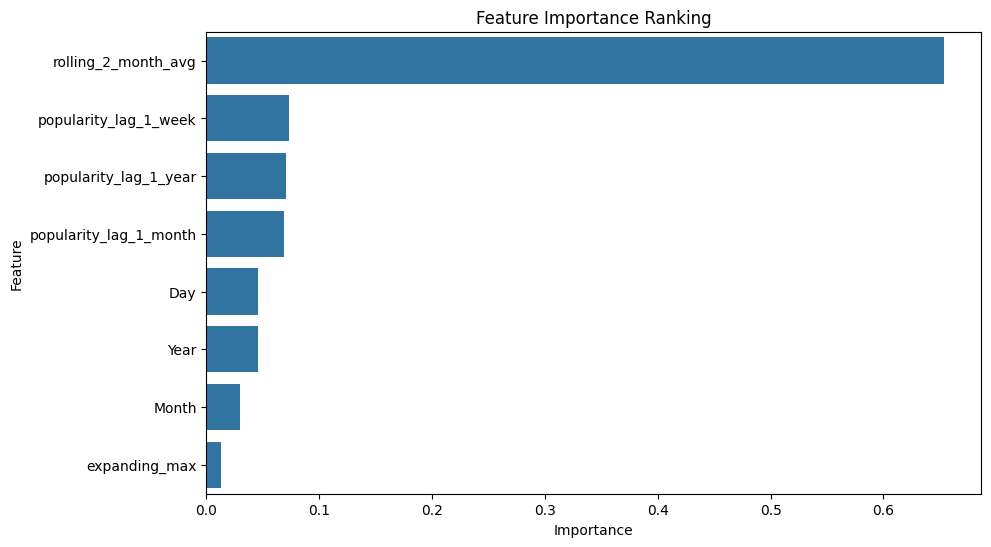

In [105]:
# Feature names
feature_names = X.columns

# Plot importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Ranking')
plt.show()


In [106]:
# Convert release_date to datetime format
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Extract date components
data['Year'] = data['release_date'].dt.year
data['Month'] = data['release_date'].dt.month
data['Day'] = data['release_date'].dt.day

# Show results
print(data[['release_date', 'Year', 'Month', 'Day']].head())

  release_date  Year  Month  Day
0   1900-01-01  1900      1    1
1   1900-01-01  1900      1    1
2   1900-01-01  1900      1    1
3   1900-01-01  1900      1    1
4   1900-01-01  1900      1    1


In [107]:
# Sort by date
data = data.sort_values('release_date')

# Lag features for popularity
data['popularity_lag_1_week'] = data['popularity'].shift(7)
data['popularity_lag_1_month'] = data['popularity'].shift(30)
data['popularity_lag_1_year'] = data['popularity'].shift(365)

# Show results
print(data[['release_date', 'popularity', 'popularity_lag_1_week', 'popularity_lag_1_month', 'popularity_lag_1_year']].head(10))


      release_date  popularity  popularity_lag_1_week  popularity_lag_1_month  \
0       1900-01-01           0                    NaN                     NaN   
28869   1900-01-01          61                    NaN                     NaN   
28870   1900-01-01          61                    NaN                     NaN   
28871   1900-01-01          16                    NaN                     NaN   
28872   1900-01-01          17                    NaN                     NaN   
28873   1900-01-01          16                    NaN                     NaN   
28874   1900-01-01          17                    NaN                     NaN   
28875   1900-01-01          62                    0.0                     NaN   
28876   1900-01-01          62                   61.0                     NaN   
28877   1900-01-01          62                   61.0                     NaN   

       popularity_lag_1_year  
0                        NaN  
28869                    NaN  
28870          

In [108]:
# Assuming 30 days per month, so 60-day window
data['rolling_2_month_avg'] = data['popularity'].rolling(window=60).mean()

# Show results
print(data[['release_date', 'popularity', 'rolling_2_month_avg']].tail(10))


       release_date  popularity  rolling_2_month_avg
135613   2021-04-16           0                  0.0
135611   2021-04-16           0                  0.0
135610   2021-04-16           0                  0.0
135609   2021-04-16           0                  0.0
135608   2021-04-16           0                  0.0
135607   2021-04-16           0                  0.0
135606   2021-04-16           0                  0.0
135605   2021-04-16           0                  0.0
135612   2021-04-16           0                  0.0
135660   2021-04-16           0                  0.0


In [109]:
data['expanding_max'] = data['popularity'].expanding().max()

# Show results
print(data[['release_date', 'popularity', 'expanding_max']].tail(10))

       release_date  popularity  expanding_max
135613   2021-04-16           0          100.0
135611   2021-04-16           0          100.0
135610   2021-04-16           0          100.0
135609   2021-04-16           0          100.0
135608   2021-04-16           0          100.0
135607   2021-04-16           0          100.0
135606   2021-04-16           0          100.0
135605   2021-04-16           0          100.0
135612   2021-04-16           0          100.0
135660   2021-04-16           0          100.0


In [110]:
# Open the file to inspect specific rows directly
with open("/workspaces/Hit_Song_Prediction_Model/tracks.csv", "r") as file:
    lines = file.readlines()

# Print the specific problematic line (for example, around row 135662)
problematic_line = lines[135661]  # Remember, Python uses 0-based indexing
print("Problematic line:", problematic_line)


Problematic line: 2v8bTSaAaCj7fCKe27Bept,What's This Thing Called Swing,0,151689,0,['Jimmie Lunceford'],['5z49AOW1q5dtslkcj6wGsW'],1939,0.598,0.611,10,-4.182,0,0.318,0.964,0.0338,0.139,0.925,198.897,4



In [111]:
# Try reading the file with a specific quotechar
data = pd.read_csv("/workspaces/Hit_Song_Prediction_Model/tracks.csv", 
                   engine='python', 
                   quotechar="'", 
                   on_bad_lines='skip')

# Print the first few rows to verify
print(data.head())


                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

In [114]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization function
def plot_ols(X, y, model, title):
    y_pred = model.predict(X)
    residuals = y - y_pred

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.scatter(y, y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"{title} - Actual vs Predicted")

    plt.subplot(2, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f"{title} - Residuals vs Predicted")

    plt.subplot(2, 2, 3)
    sns.histplot(residuals, kde=True)
    plt.title(f"{title} - Residuals Histogram")

    plt.subplot(2, 2, 4)
    sm.qqplot(residuals, line='45', ax=plt.gca())
    plt.title(f"{title} - QQ Plot")

    plt.tight_layout()
    plt.show()

# Load data with specific quotechar
data = pd.read_csv("/workspaces/Hit_Song_Prediction_Model/tracks.csv", 
                   engine='python', 
                   quotechar="'", 
                   on_bad_lines='skip')  # Use the same quotechar as before

# Select numeric columns and clean up missing values
numeric_data = data.select_dtypes(include='number').copy()
numeric_data.dropna(inplace=True)

# Print the first few rows to verify
print(data.head())


                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

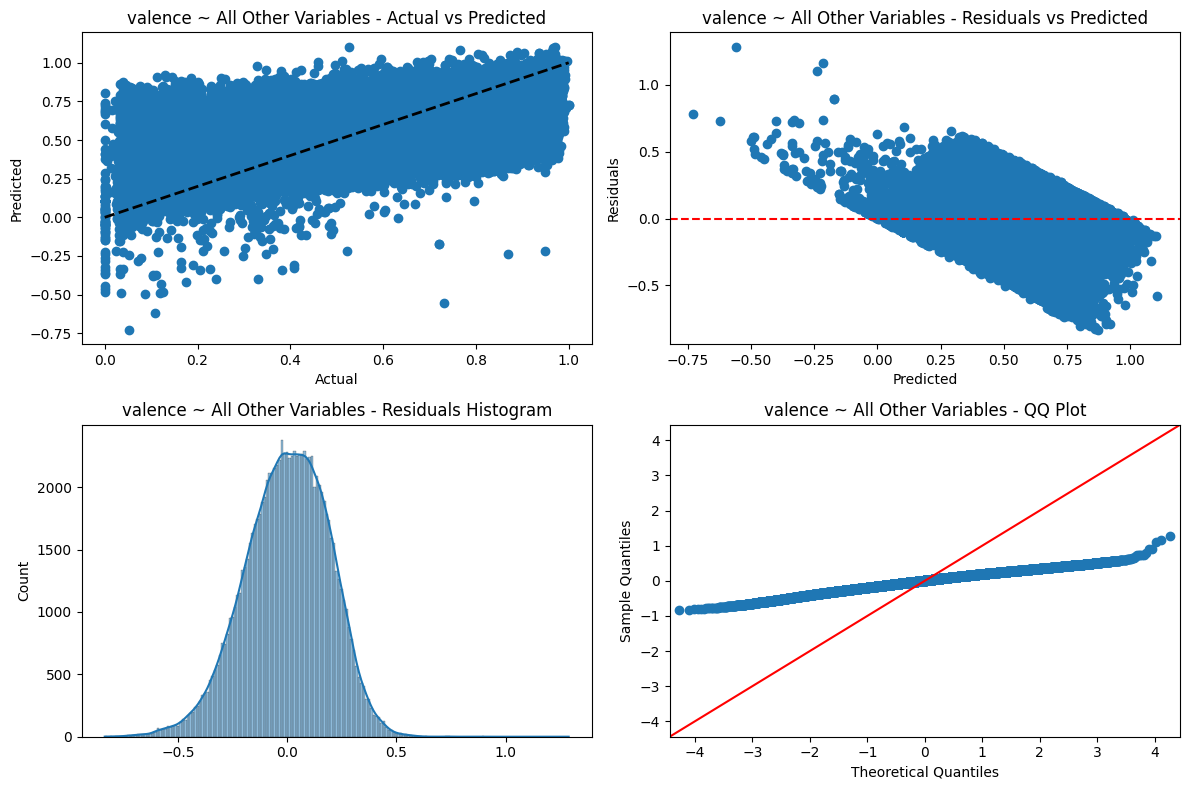

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     5459.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:37:08   Log-Likelihood:                 23750.
No. Observations:              101315   AIC:                        -4.747e+04
Df Residuals:                  101300   BIC:                        -4.733e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4003      0.008  

In [115]:
target = 'valence'
X = numeric_data.drop(columns=[target])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Other Variables")
print(model.summary())


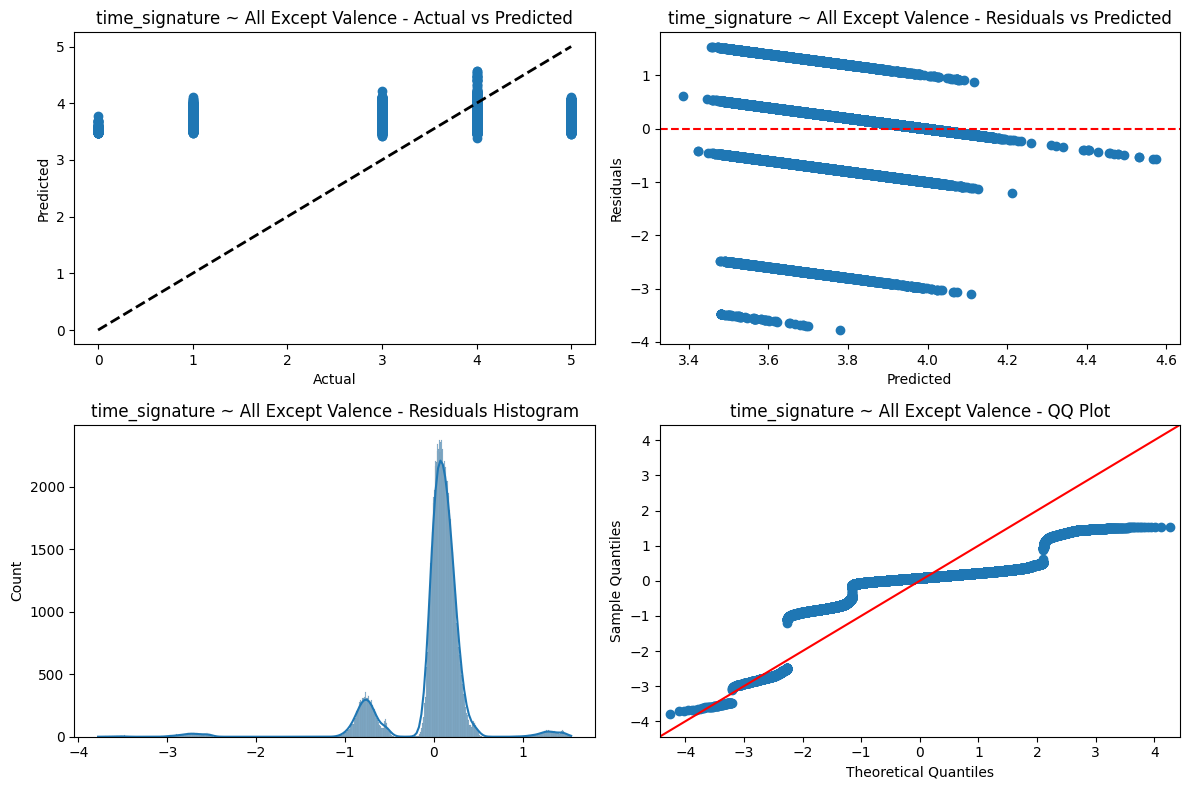

                            OLS Regression Results                            
Dep. Variable:         time_signature   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     591.9
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:37:15   Log-Likelihood:                -64063.
No. Observations:              101315   AIC:                         1.282e+05
Df Residuals:                  101301   BIC:                         1.283e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.4893      0.015  

In [116]:
target = 'time_signature'
X = numeric_data.drop(columns=[target, 'valence'])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Except Valence")
print(model.summary())


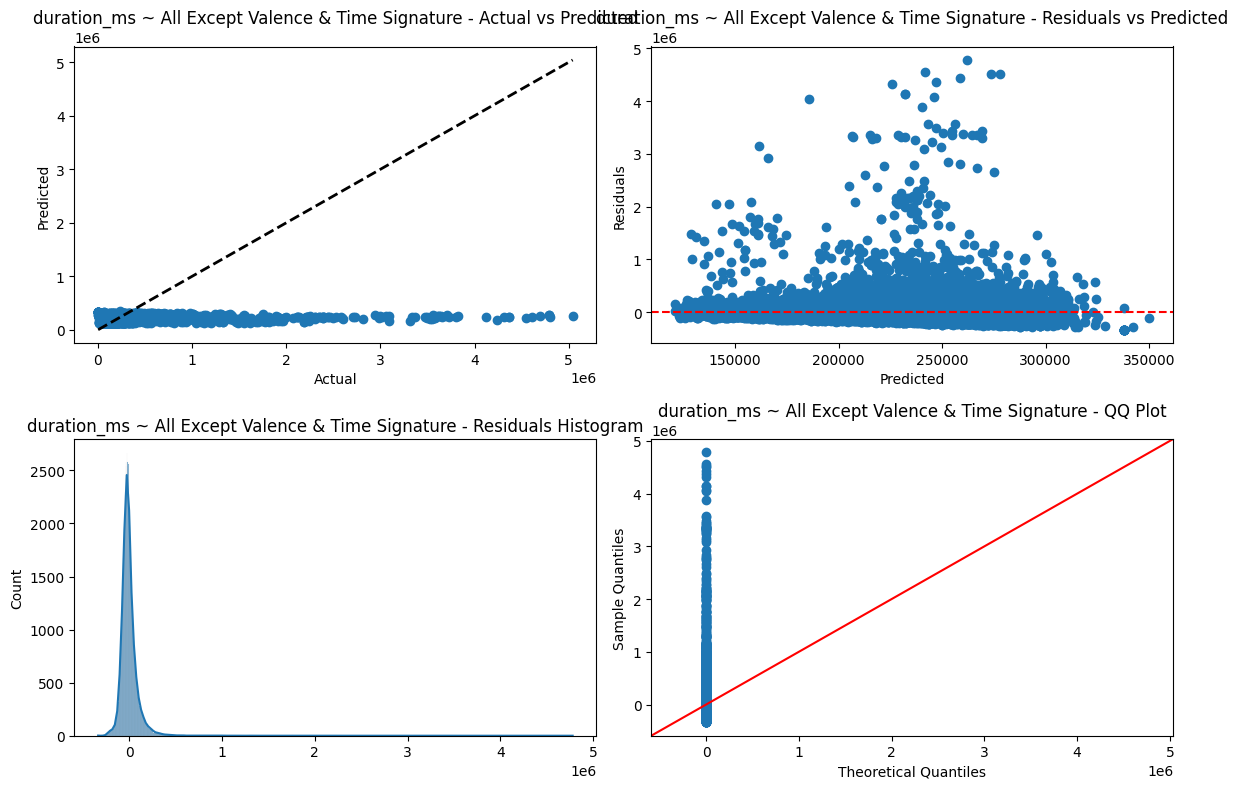

                            OLS Regression Results                            
Dep. Variable:            duration_ms   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     411.2
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:37:23   Log-Likelihood:            -1.3338e+06
No. Observations:              101315   AIC:                         2.668e+06
Df Residuals:                  101302   BIC:                         2.668e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.867e+05   4170.407  

In [117]:
target = 'duration_ms'
X = numeric_data.drop(columns=[target, 'valence', 'time_signature'])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Except Valence & Time Signature")
print(model.summary())


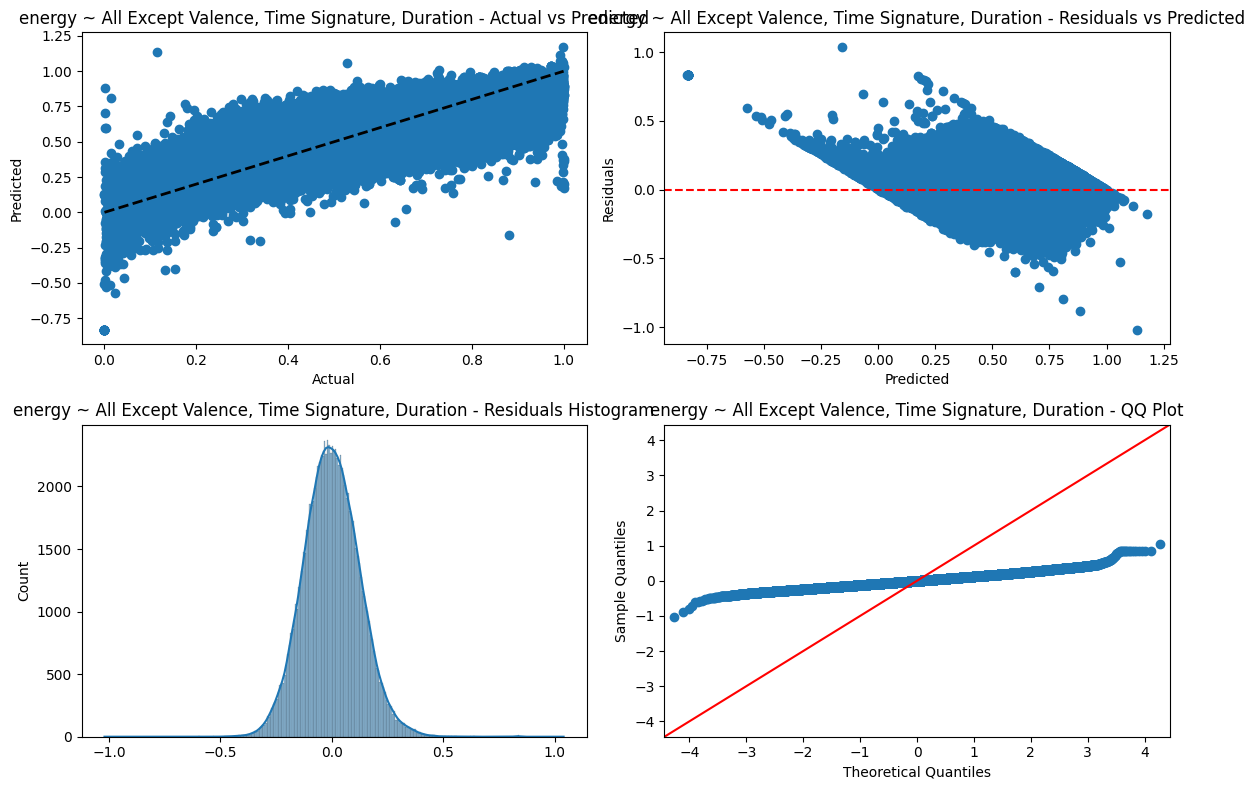

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 2.918e+04
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:37:28   Log-Likelihood:                 66507.
No. Observations:              101315   AIC:                        -1.330e+05
Df Residuals:                  101303   BIC:                        -1.329e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8712      0.003  

In [118]:
target = 'energy'
X = numeric_data.drop(columns=[target, 'valence', 'time_signature', 'duration_ms'])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Except Valence, Time Signature, Duration")
print(model.summary())


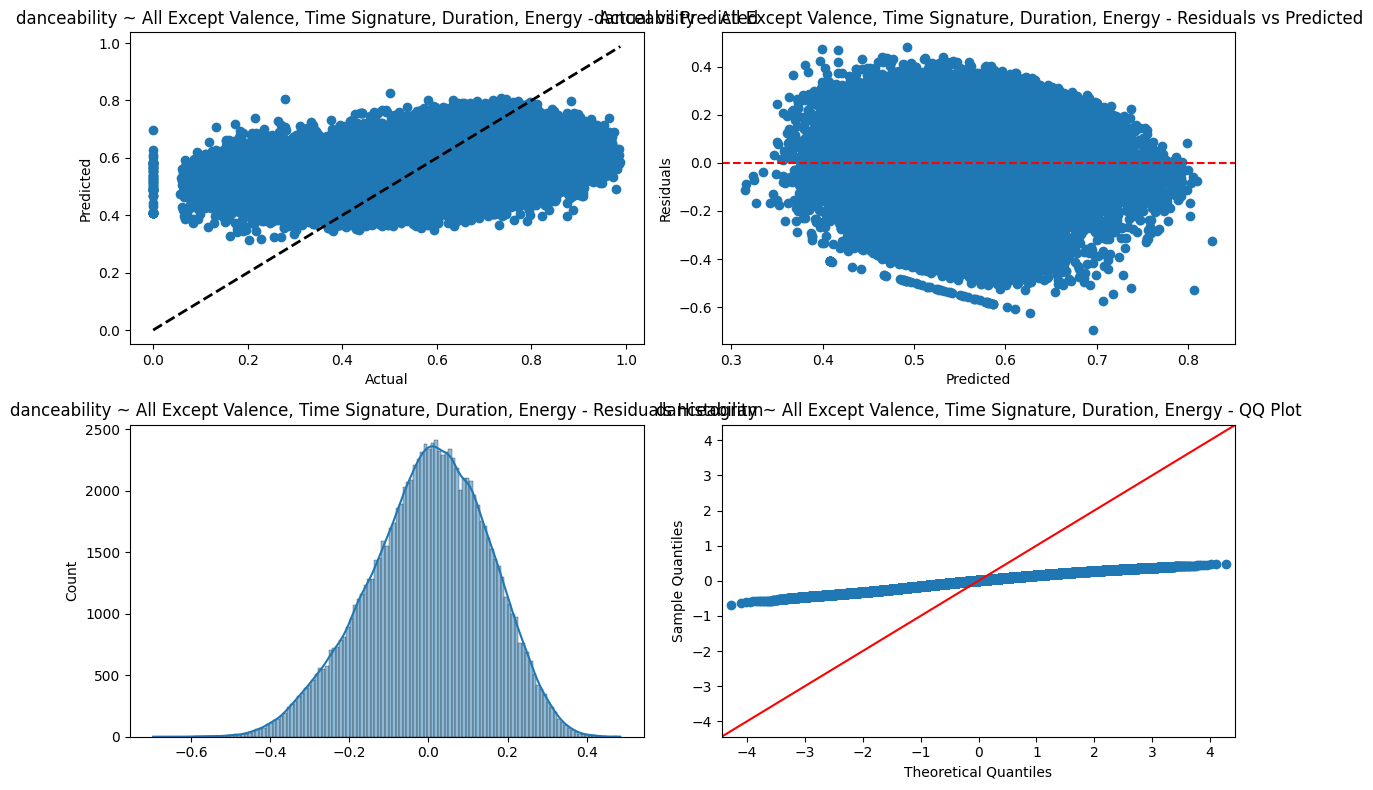

                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1402.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:37:34   Log-Likelihood:                 46950.
No. Observations:              101315   AIC:                        -9.388e+04
Df Residuals:                  101304   BIC:                        -9.377e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7052      0.003  

In [119]:
target = 'danceability'
X = numeric_data.drop(columns=[target, 'valence', 'time_signature', 'duration_ms', 'energy'])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Except Valence, Time Signature, Duration, Energy")
print(model.summary())

In [120]:
import pandas as pd
import statsmodels.api as sm

# Load data with specific quotechar and skip bad lines
data = pd.read_csv("/workspaces/Hit_Song_Prediction_Model/tracks.csv", 
                   engine='python', 
                   quotechar="'", 
                   on_bad_lines='skip')

# Define the target variable (popularity) and the predictor variables
X = data[['danceability', 'explicit', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']]  # Predictor variables
y = data['popularity']  # Target variable

# Drop rows where any predictor variable or target variable is missing
X = X.dropna()
y = y[X.index]  # Keep the target variable aligned with the cleaned predictor variables

# Check for infinite values and replace them with NaN
X.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop rows with infinite values (if any)
X = X.dropna()
y = y[X.index]  # Keep the target variable aligned with the cleaned predictor variables

# Add a constant to the predictor variables (for the intercept term)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     4585.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:37:41   Log-Likelihood:            -4.4368e+05
No. Observations:              101315   AIC:                         8.874e+05
Df Residuals:                  101304   BIC:                         8.875e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               51.3815      0.451  

In [122]:
import pandas as pd

# Load your dataset with additional parameters
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv', 
                 engine='python', 
                 on_bad_lines='skip', 
                 quotechar="'")  # Ensuring proper handling of quotes

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Show the correlation of all variables with 'popularity'
if 'popularity' in numeric_df.columns:
    print(correlation_matrix['popularity'])


                  popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000     0.091813  0.174751      0.079223  0.343545   
duration_ms         0.091813     1.000000  0.016192     -0.055835  0.107880   
explicit            0.174751     0.016192  1.000000      0.097046  0.137545   
danceability        0.079223    -0.055835  0.097046      1.000000  0.137257   
energy              0.343545     0.107880  0.137545      0.137257  1.000000   
key                 0.015723     0.014250  0.014629      0.018545  0.037476   
loudness            0.320866     0.062982  0.141589      0.121029  0.749562   
mode               -0.026890    -0.054495 -0.048354     -0.037830 -0.055098   
speechiness        -0.197087    -0.104664  0.091735      0.198787 -0.117233   
acousticness       -0.453806    -0.160847 -0.162630     -0.156354 -0.728906   
instrumentalness   -0.308871     0.024834 -0.064826     -0.109653 -0.112908   
liveness           -0.072833     0.042646  0.019071 

In [123]:
import statsmodels.api as sm

# Handle missing values by dropping rows with any NaN or infinite values
df_cleaned = df[['danceability', 'explicit', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'popularity']].dropna()
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinite values

# Define the target variable (popularity) and the predictor variables
X = df_cleaned[['danceability', 'explicit', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']]  # Predictor variables
y = df_cleaned['popularity']  # Target variable

# Add a constant to the predictor variables (for the intercept term)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     4585.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:38:02   Log-Likelihood:            -4.4368e+05
No. Observations:              101315   AIC:                         8.874e+05
Df Residuals:                  101304   BIC:                         8.875e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               51.3815      0.451  

In [124]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv', 
                 engine='python', 
                 on_bad_lines='skip', 
                 quotechar="'")  # Ensuring proper handling of quotes

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation between 'popularity' and the selected variables
correlation_with_popularity = numeric_df[['popularity', 'loudness', 'acousticness', 'energy', 'danceability', 'explicit']].corr()

# Display the correlation values of the selected variables with 'popularity'
print(correlation_with_popularity['popularity'])

popularity      1.000000
loudness        0.320866
acousticness   -0.453806
energy          0.343545
danceability    0.079223
explicit        0.174751
Name: popularity, dtype: float64


# The Different Variation in Popular (POP) Music

Loudness: Refers to the overall volume or amplitude of the audio in a track. It typically indicates how loud or soft the song sounds. Higher values indicate a louder track, while lower values suggest a quieter one.

Acoustics: This relates to the qualities of the sound in a recording, such as how natural, clean, or spacious the music feels. It can be influenced by things like the use of reverb, the presence of background noise, or the clarity of the recording.

Energy: Represents the intensity and activity level of a song. High energy tracks often have fast tempos, loud volumes, and intense instruments, while lower energy songs tend to be more relaxed, slower, and quieter.

Danceability: Measures how suitable a song is for dancing, considering rhythm, tempo, beat consistency, and overall groove. A higher danceability score typically means the song has a rhythm that encourages movement, while lower scores suggest it might not be as rhythmic or suitable for dancing.

Explicitness: Indicates whether a song contains explicit content, such as strong language or adult themes. A higher value suggests that the song may include profane language or other mature content, while lower values suggest a more family-friendly track.

/tmp/ipykernel_11454/248176016.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_popularity.index[1:], y=correlation_with_popularity['popularity'][1:], palette='viridis')


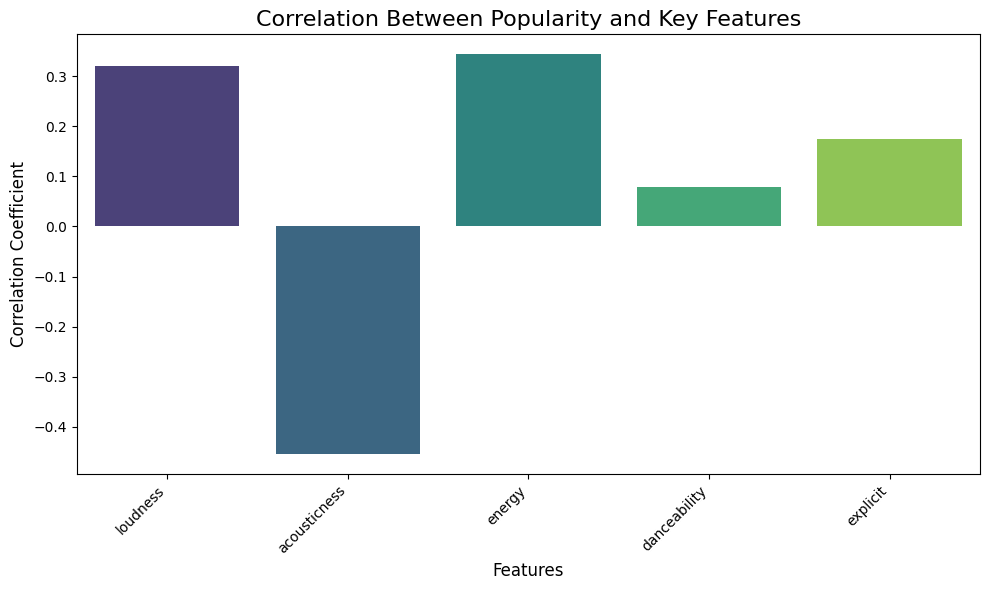

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv', 
                 engine='python', 
                 on_bad_lines='skip', 
                 quotechar="'")  # Ensuring proper handling of quotes

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation between 'popularity' and the selected variables
correlation_with_popularity = numeric_df[['popularity', 'loudness', 'acousticness', 'energy', 'danceability', 'explicit']].corr()

# Create a bar plot for the correlation values with popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_popularity.index[1:], y=correlation_with_popularity['popularity'][1:], palette='viridis')

# Customize the graph
plt.title('Correlation Between Popularity and Key Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [126]:
# Display the column names to identify the correct one
print(df.columns)


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [127]:
# Convert the 'release_date' column to datetime while coercing errors to NaT (Not a Time)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Set the 'release_date' as the index
df.set_index('release_date', inplace=True)

# Extract the year, month, and day
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

# Display the updated DataFrame
print(df.head())


                                  id                                 name  \
release_date                                                                
1922-02-22    35iwgR4jXetI318WEWsa1Q                                Carve   
1922-06-01    021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
1922-03-21    07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
1922-03-21    08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
NaT           08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   

              popularity  duration_ms  explicit              artists  \
release_date                                                           
1922-02-22             6       126903         0              ['Uli']   
1922-06-01             0        98200         0  ['Fernando Pessoa']   
1922-03-21             0       181640         0  ['Ignacio Corsini']   
1922-03-21             0       176907         0  ['Ignacio Corsini']   
NaT                    0    

In [128]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

print(df[['year', 'month', 'day']].head())

                year  month   day
release_date                     
1922-02-22    1922.0    2.0  22.0
1922-06-01    1922.0    6.0   1.0
1922-03-21    1922.0    3.0  21.0
1922-03-21    1922.0    3.0  21.0
NaT              NaN    NaN   NaN
